In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io

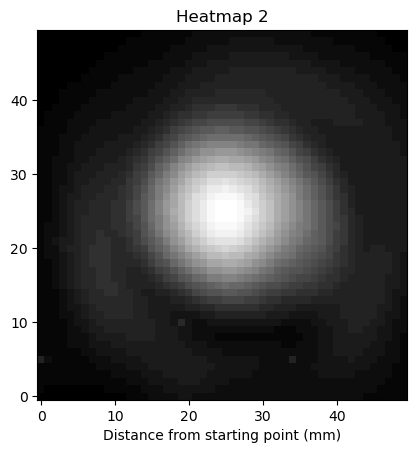

In [ ]:
object = np.loadtxt("./images/4_16_25_base.csv", delimiter=",")  # Assumes CSV has headers
# Plot heatmap
img2 = plt.imshow(object, cmap="gray", interpolation="nearest", origin="lower")
plt.title("Heatmap 2")
plt.xlabel("Distance from starting point (mm)")
plt.show()

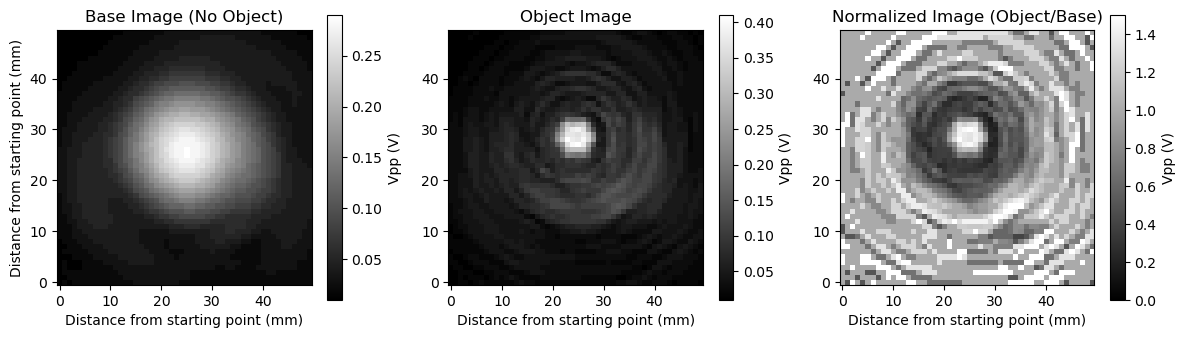

In [ ]:
base_path = "./images/4_16_25_base_holder.csv" # Sets relative path of input base image csv
object_path = "./images/4_16_25_base_nut.csv" # Sets relative path of input object image csv
difference_path = "./mat_files/4_16_25_large_nut.mat" # Sets relative path of output mat file
plot_path = "./plots/4_16_25_large_nut.png" # Sets relative path of output plot (whats shown when this runs)

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 3, figsize=(12, 6))  # Adjust figsize as needed
base = np.loadtxt(base_path, delimiter=",")  # Assumes CSV has headers
object = np.loadtxt(object_path, delimiter=",")  # Assumes CSV has headers
difference = abs(object / base)
difference = np.nan_to_num(difference, nan=0.0, posinf=0.0, neginf=0.0)
# df_difference.replace([np.inf, np.nan], 0, inplace=True)
scipy.io.savemat(difference_path, {"df_difference": difference})

# Plot first heatmap
img1 = ax[0].imshow(base, cmap="gray", interpolation="nearest", origin="lower")
ax[0].set_title("Base Image (No Object)")
ax[0].set_xlabel("Distance from starting point (mm)")
ax[0].set_ylabel("Distance from starting point (mm)")

#Plot second heatmap
img2 = ax[1].imshow(object, cmap="gray", interpolation="nearest", origin="lower")
ax[1].set_title("Object Image")
ax[1].set_xlabel("Distance from starting point (mm)")

#Plot third heatmap
img3 = ax[2].imshow(difference, cmap="gray", interpolation="nearest", origin="lower")
ax[2].set_title("Normalized Image (Object/Base)")
ax[2].set_xlabel("Distance from starting point (mm)")
img3.set_clim(0, 1.5)

# Add colorbars
fig.colorbar(img1, ax=ax[0], shrink=0.5, label="Vpp (V)")
fig.colorbar(img2, ax=ax[1], shrink=0.5, label="Vpp (V)")
fig.colorbar(img3, ax=ax[2], shrink=0.5, label="Vpp (V)")

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
plt.savefig(plot_path)